<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Семинарская часть

Функция `select_model` принимает на вход обучающую выборку и возвращает модель (машину опорных векторов) с наилучшими параметрами для данной выборки. Эту функцию нужно реализовать.

Подбираемые параметры подели включают в себя:
- различные функции ядра (линейное, RBF, полиномиальные разных степеней)
- различные значения константы $C$ ($0, 0.1, 1, 10, 100, 1000, 10000$)

Подбирать параметры необходимо с помощью 10-fold кросс-валидации. Сейчас в качестве заглушки функция всегда возвращает линейный SVC.

In [16]:
from sklearn.model_selection import KFold

In [21]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    list_of_kernels=('linear', 'poly', 'rbf', 'sigmoid')
    list_of_cs=(0.1,1,10,100,1000,10000)
    for kernel in list_of_kernels:
        for C in list_of_cs:
            accuracy=0
            model = SVC(C=C,kernel=kernel)
            print "Trying model {}".format(model)
            kf=KFold(n_splits=10)
            for train_index, test_index in kf.split(x):
                x_train, x_test = x[train_index], x[test_index]
                y_train, y_test = y[train_index], y[test_index]
                model.fit(x_train,y_train)
                accuracy+= np.mean(cross_val_score(model, x_test, y_test))
            accuracy/=10
            if (accuracy>best_accuracy):
                best_accuracy=accuracy
                best_model=model
    best_model.fit(x, y)
    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

Далее две вспомогательные функции, которые отображают данные и разделяющую поверхность

In [7]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

In [ ]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

In [ ]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

In [ ]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

In [2]:
df=pd.read_csv('titanium.csv')
df.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

In [10]:
from sklearn import preprocessing

In [11]:
df_scaled = preprocessing.scale(df)

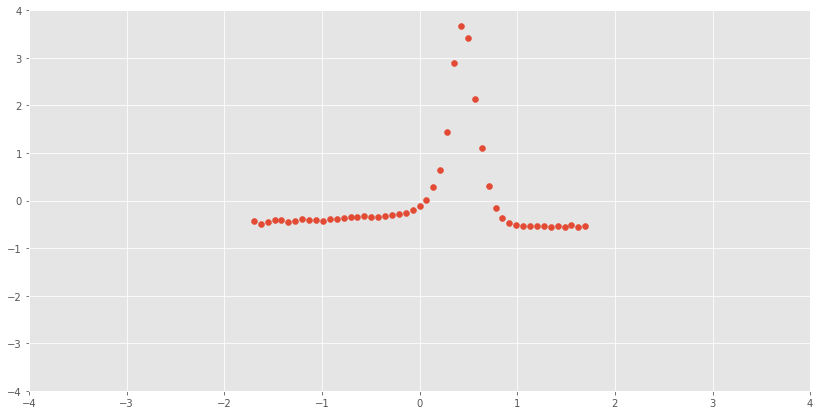

In [12]:
fig = plt.figure(figsize=(14, 7))
#ax = fig.add_subplot(1, 2, 1)
plt.axis([-4.0, 4.0,-4.0, 4.0])
plt.scatter(df_scaled[:,0],df_scaled[:,1])

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [13]:
from sklearn.metrics import mean_absolute_error
x,y=df_scaled[:,0],df_scaled[:,1]

In [14]:
x=x.reshape(-1,1)


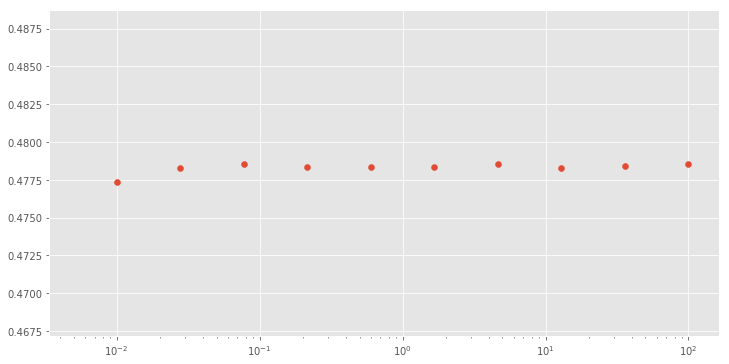

In [15]:
c=np.logspace(-2,2,10)
errors = np.empty(len(c))
i=0
for C in c:
    model=SVR(C=C,kernel='linear',tol=0.01)
    model.fit(x,y)
    p=model.predict(x)
    errors[i]=mean_absolute_error(p,y)
    i+=1
plt.scatter(c,errors)
plt.xscale('log')


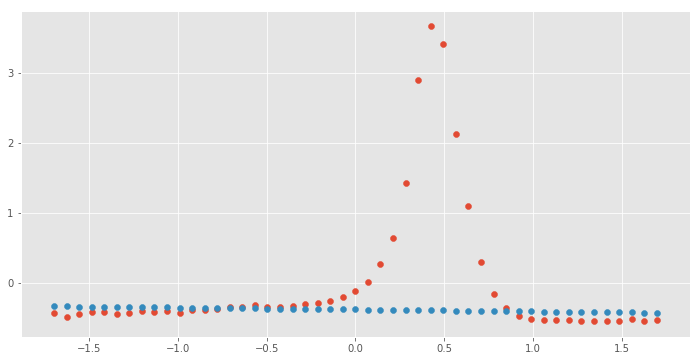

In [16]:
model=SVR(C=c[np.argmin(errors)],kernel='linear',tol=0.01)
model.fit(x,y)
p=model.predict(x)
plt.scatter(df_scaled[:,0],df_scaled[:,1])
plt.scatter(df_scaled[:,0],p)

Недообучение

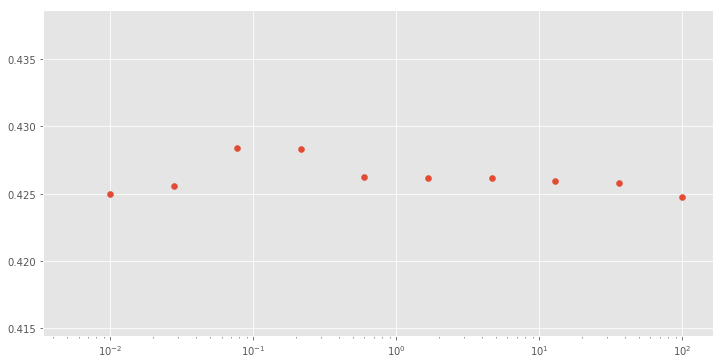

In [17]:
c=np.logspace(-2,2,10)
errors = np.empty(len(c))
i=0
for C in c:
    model=SVR(C=C,kernel='poly',degree=3,gamma=6,coef0=1,tol=0.01)
    model.fit(x,y)
    p=model.predict(x)
    errors[i]=mean_absolute_error(p,y)
    i+=1
plt.scatter(c,errors)
plt.xscale('log')


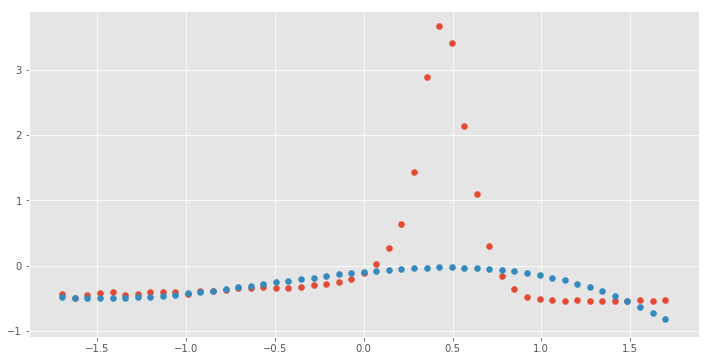

In [18]:
model=SVR(C=c[np.argmin(errors)],kernel='poly',degree=3,gamma=6,coef0=1,tol=0.01)
model.fit(x,y)
p=model.predict(x)
plt.scatter(df_scaled[:,0],df_scaled[:,1])
plt.scatter(df_scaled[:,0],p)

Недообучение

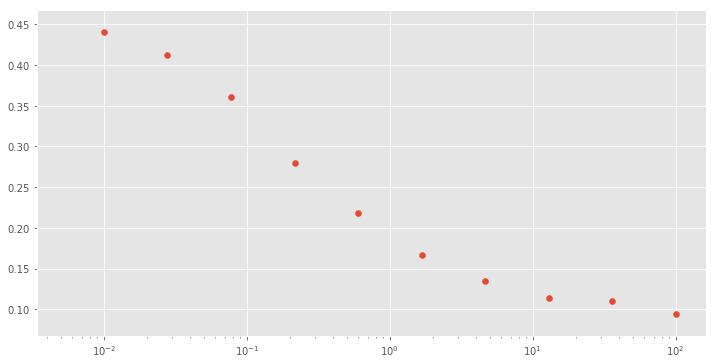

In [19]:
c=np.logspace(-2,2,10)
errors = np.empty(len(c))
i=0
for C in c:
    model=SVR(C=C,kernel='rbf',gamma=6,coef0=1,tol=0.01)
    model.fit(x,y)
    p=model.predict(x)
    errors[i]=mean_absolute_error(p,y)
    i+=1
plt.scatter(c,errors)
plt.xscale('log')


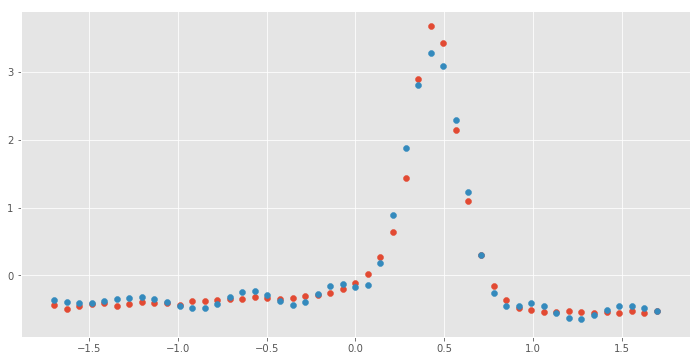

In [20]:
model=SVR(C=c[np.argmin(errors)],kernel='rbf',gamma=6,coef0=1,tol=0.01)
model.fit(x,y)
p=model.predict(x)
plt.scatter(df_scaled[:,0],df_scaled[:,1])
plt.scatter(df_scaled[:,0],p)

Переобучение

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [71]:
es=pd.read_table('war_and_peace_es.txt')
missing=es.columns[0]
es.columns=['word']
es.loc[es.shape[0],'word']=missing
es['label']=0

In [72]:
en=pd.read_table('war_and_peace_en.txt')
missing=en.columns[0]
en.columns=['word']
en.loc[en.shape[0],'word']=missing
en['label']=1
en.index+=es.shape[0]

In [73]:
df=pd.concat([es,en])
df.index.name='index'

In [74]:
# like this

df.head()

,word,label
index,,
0,pace,0
1,lev,0
2,nicoevic,0
3,tolstj,0
4,traduzione,0


In [75]:
df.shape

(11403, 2)

## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [76]:
from sklearn.cross_validation import train_test_split

In [77]:
RND_SEED =42

In [78]:
df=df.sample(frac=0.15,random_state=RND_SEED)
df=df.reset_index()
del df['index']

In [79]:
df.index.name='index'
x=np.array(df.index)
y=np.array(df['label'])
x=x.reshape(-1,1)

In [80]:
x.shape

(1710L, 1L)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.4, random_state=RND_SEED)

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [82]:
dar=np.array(df)

In [83]:
def distance(a, b):
    "Calculates the Levenshtein distance between a and b."
    n, m = len(a), len(b)
    if n > m:
        # Make sure n <= m, to use O(min(n,m)) space
        a, b = b, a
        n, m = m, n

    current_row = range(n+1) # Keep current and previous row, not entire matrix
    for i in range(1, m+1):
        previous_row, current_row = current_row, [i]+[0]*n
        for j in range(1,n+1):
            add, delete, change = previous_row[j]+1, current_row[j-1]+1, previous_row[j-1]
            if a[j-1] != b[i-1]:
                change += 1
            current_row[j] = min(add, delete, change)

    return current_row[n]

In [84]:
from math import exp

In [85]:
def string_kernel(U, V):
        res=np.empty(shape=[U.shape[0],V.shape[0]])
        for i in xrange(U.shape[0]):
            for j in xrange(V.shape[0]):
                res[i][j]=exp(-(1/U.shape[1])*(distance((dar[U[i][0]])[0][0],(dar[V[j][0]])[0][0])^2))
        return res
                            
G = string_kernel(X_train, X_train)

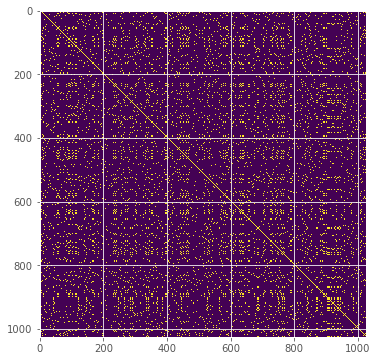

In [86]:
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
from sklearn.preprocessing import binarize

In [87]:
list_of_cs=(0.1,0.5,1,2,4,8,16)

In [88]:
for C in list_of_cs:
    model=SVR(C=C,kernel=string_kernel)
    model.fit(X_train,y_train)
    test=model.predict(X_train)
    prediction=model.predict(X_test)
    p_bin=binarize(X=prediction.reshape(-1,1),threshold=0.5)
    t_bin=binarize(X=test.reshape(-1,1),threshold=0.5)
    print C, accuracy_score(t_bin,y_train), accuracy_score(p_bin,y_test)

C:\Jabarda\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


0.1 0.690058479532 0.687134502924
0.5 0.721247563353 0.711988304094
1 0.7261208577 0.714912280702
2 0.727095516569 0.713450292398
4 0.727095516569 0.713450292398
8 0.727095516569 0.713450292398
16 0.727095516569 0.713450292398
